## 1. Data

In [1]:
import pandas as pd
top_re = pd.read_csv("top_10000_papers.csv")

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

citation_graph = nx.DiGraph()

# Extracting and adding directed edges for citation relationships
citation_edges = []
for _, row in top_re.dropna(subset=['references']).iterrows():
    references = str(row['references']).split(';')
    for reference in references:
        if reference and reference != 'nan':
            # Ensuring that both source and target nodes are in the top 10,000 papers
            if row['id'] in top_re['id'].values and int(reference) in top_re['id'].values:
                citation_edges.append((row['id'], int(reference)))

citation_graph.add_edges_from(citation_edges)



In [3]:
print(citation_graph)

DiGraph with 9429 nodes and 52289 edges


In [4]:
in_degree = citation_graph.in_degree()

# Counting the number of nodes with incoming edges (cited papers)
num_cited_papers = sum(1 for _, degree in in_degree if degree > 0)

print(f"Number of papers cited: {num_cited_papers}")

Number of papers cited: 8078


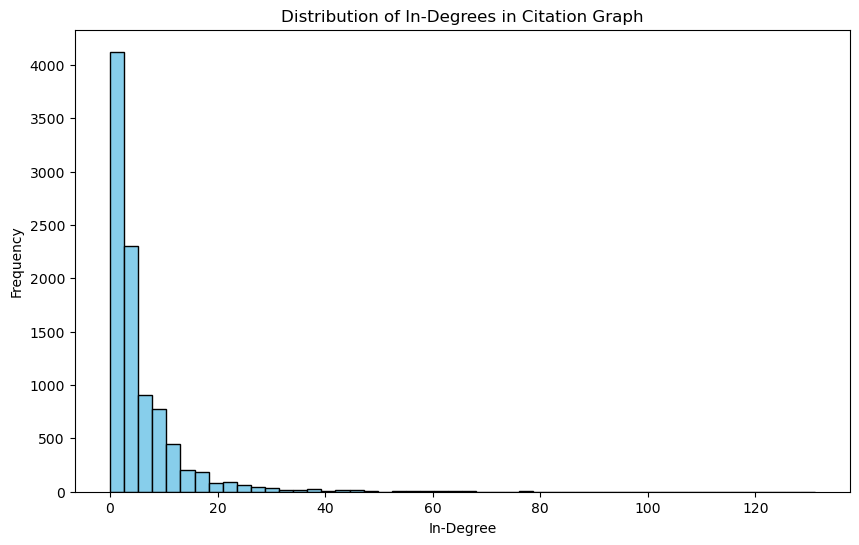


Top 10 Highly Cited Papers:
Paper ID: 2151103935, In-Degree: 131
Paper ID: 2156909104, In-Degree: 120
Paper ID: 1791587663, In-Degree: 117
Paper ID: 1639032689, In-Degree: 104
Paper ID: 2041404167, In-Degree: 95
Paper ID: 2161969291, In-Degree: 94
Paper ID: 2125055259, In-Degree: 89
Paper ID: 2156186849, In-Degree: 87
Paper ID: 2147152072, In-Degree: 78
Paper ID: 1956559956, In-Degree: 76

Number of Connected Components: 44


In [5]:
import matplotlib.pyplot as plt

in_degrees = dict(citation_graph.in_degree())
in_degree_values = list(in_degrees.values())

plt.figure(figsize=(10, 6))
plt.hist(in_degree_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of In-Degrees in Citation Graph')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.show()

# Identifying Highly Cited Papers (Top 10)
top_cited_papers = sorted(in_degrees, key=in_degrees.get, reverse=True)[:10]
print("\nTop 10 Highly Cited Papers:")
for paper_id in top_cited_papers:
    print(f"Paper ID: {paper_id}, In-Degree: {in_degrees[paper_id]}")

# Connected Components
connected_components = list(nx.weakly_connected_components(citation_graph))
num_connected_components = len(connected_components)

print(f"\nNumber of Connected Components: {num_connected_components}")


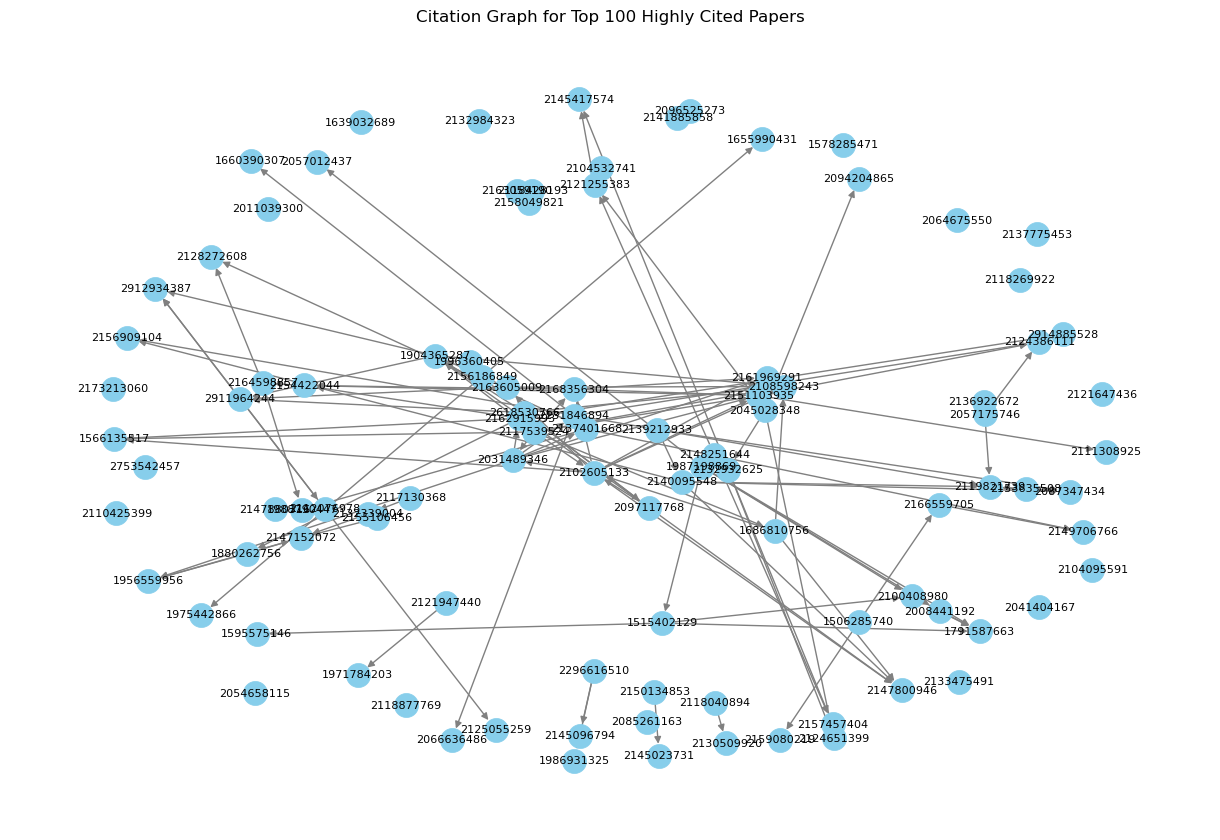

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'top_10_cited_papers' contains the IDs of the top 10 highly cited papers
top_10_cited_papers = sorted(in_degrees, key=in_degrees.get, reverse=True)[:100]

# Extracting the subgraph for the top 10 highly cited papers
subgraph_top_10 = citation_graph.subgraph(top_10_cited_papers)

# Plotting the subgraph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph_top_10)
nx.draw(subgraph_top_10, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=300, edge_color='gray', linewidths=0.5)
plt.title('Citation Graph for Top 100 Highly Cited Papers')
plt.show()


In [7]:
collaboration_graph = nx.Graph()

# Extracting and adding edges for collaborations among authors
for _, row in top_re.dropna(subset=['author_name']).iterrows():
    authors = str(row['author_name']).split(';')
    papers = str(row['references']).split(';') if 'references' in row and pd.notna(row['references']) else []

    # Excluding collaborations if any author's name is missing or 'nan'
    if len(authors) > 1 and all(author.lower() != 'nan' for author in authors):
        # Iterating over pairs of authors and add collaboration edges
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):
                author_pair = tuple(sorted([authors[i], authors[j]]))
                if collaboration_graph.has_edge(*author_pair):
                    collaboration_graph[authors[i]][authors[j]]['weight'] += 1
                    collaboration_graph[authors[i]][authors[j]]['papers'].extend(papers)
                else:
                    collaboration_graph.add_edge(*author_pair, weight=1, papers=papers.copy())


In [8]:
num_nodes_collaboration = collaboration_graph.number_of_nodes()
num_edges_collaboration = collaboration_graph.number_of_edges()

print(f"Number of Nodes in Collaboration Graph: {num_nodes_collaboration}")
print(f"Number of Edges in Collaboration Graph: {num_edges_collaboration}")

Number of Nodes in Collaboration Graph: 16485
Number of Edges in Collaboration Graph: 52284


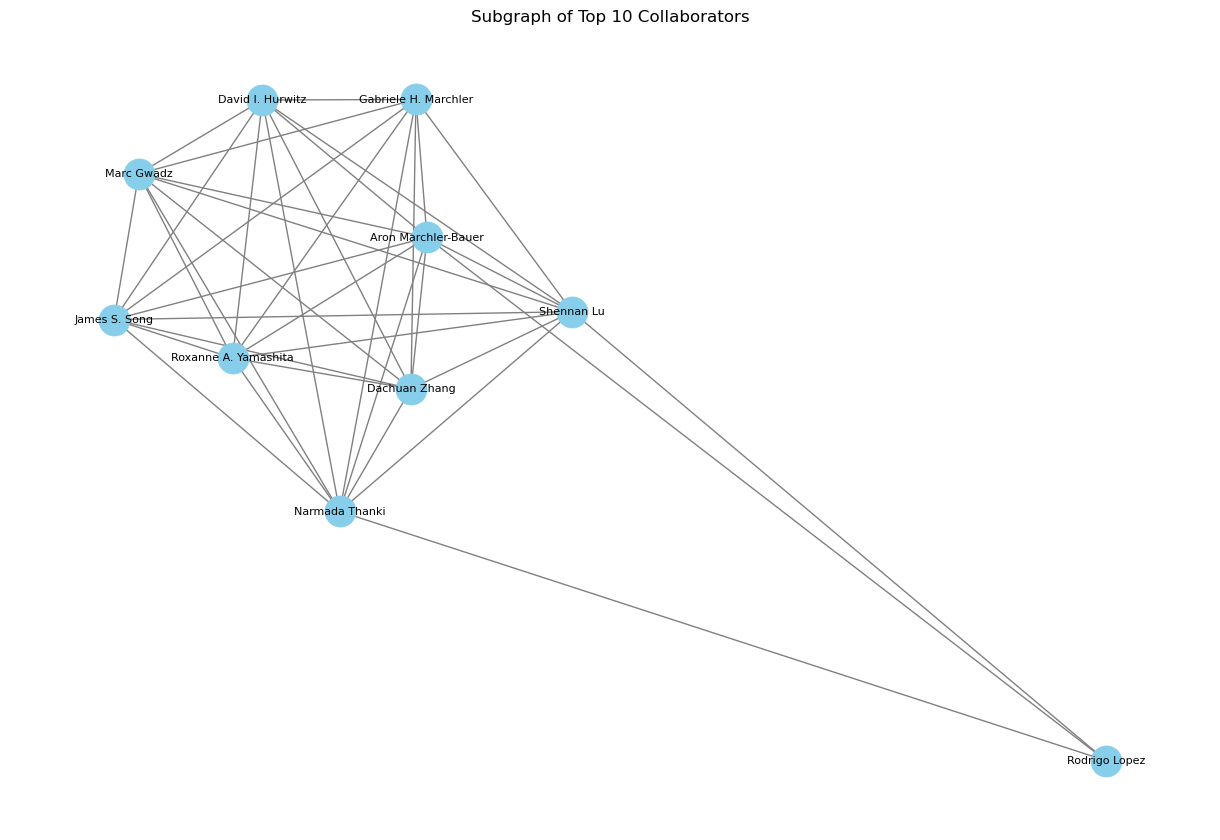

In [9]:
# Extracting the top 10 collaborators based on collaboration weight
top_10_collaborators = sorted(collaboration_graph.nodes(), key=lambda x: sum(collaboration_graph[x][neighbor]['weight'] for neighbor in collaboration_graph.neighbors(x)), reverse=True)[:10]

# Creating a subgraph for the top 10 collaborators
subgraph_top_10 = collaboration_graph.subgraph(top_10_collaborators)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph_top_10, k=0.3)  # Layout for visualization
edge_weights_top_10 = [subgraph_top_10[u][v]['weight'] for u, v in subgraph_top_10.edges()]
nx.draw(subgraph_top_10, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=500, edge_color='gray', linewidths=0.5)
plt.title('Subgraph of Top 10 Collaborators')
plt.show()

2.1 Functionality

1. Functionality 1

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def graph_features(graph, graph_name):

    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)

    # Graph degree distribution
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degree_distribution = {degree: degree_sequence.count(degree) for degree in set(degree_sequence)}

    # Average degree
    avg_degree = np.mean(list(dict(graph.degree()).values()))

    # Graph density classification
    density_classification = "dense" if density >= 0.5 else "sparse"

    general_info = pd.DataFrame({
        "Attribute": ["Number of Nodes", "Number of Edges", "Density", "Average Degree", "Network Type"],
        "Value": [num_nodes, num_edges, density, avg_degree, density_classification]
    })

    return general_info


Visualization 1

General Information for Citation Graph:

+---+-----------------+-----------------------+
|   |    Attribute    |         Value         |
+---+-----------------+-----------------------+
| 0 | Number of Nodes |         9429          |
| 1 | Number of Edges |         52289         |
| 2 |     Density     | 0.0005882001442304685 |
| 3 | Average Degree  |  11.091101919609715   |
| 4 |  Network Type   |        sparse         |
+---+-----------------+-----------------------+

Hubs for Citation Graph:

       Hub Node  Degree
0    2151103935     144
1    1676552347      32
2    2024668293      34
3    2109863423      35
4    2111308925      47
..          ...     ...
455  2044762091      31
456  2107561590      32
457  2115167851      64
458  2277195237      40
459  2624989916      32

[460 rows x 2 columns]


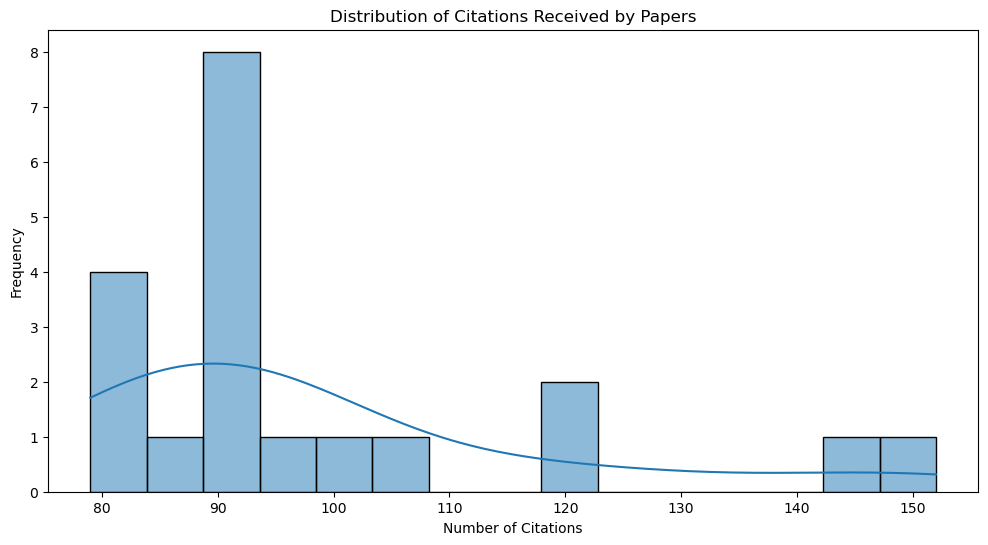

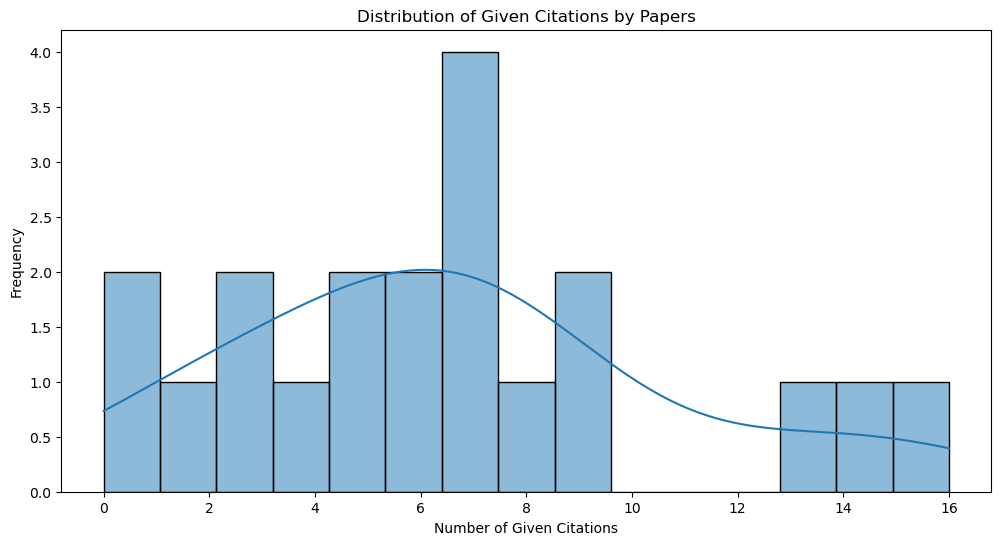

In [11]:
import pandas as pd
import seaborn as sns

def visualize_graph_features(graph, graph_name, num_nodes_to_display=20):

    general_info = graph_features(graph, graph_name)

    # Print tabulated general information
    print(f"General Information for {graph_name}:\n")
    print(tabulate(general_info, headers="keys", tablefmt="pretty"))

    # Hubs Table
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degree_percentile_95 = np.percentile(degree_sequence, 95)
    hubs = [(node, degree) for node, degree in dict(graph.degree()).items() if degree > degree_percentile_95]
    hubs_table = pd.DataFrame(hubs, columns=["Hub Node", "Degree"])
    print(f"\nHubs for {graph_name}:\n")
    print(hubs_table)

    # Citation Distribution Plot (for Citation Graph)
    if graph_name == 'Citation Graph':
        plt.figure(figsize=(12, 6))
        sns.histplot(degree_sequence[:num_nodes_to_display], bins=15, kde=True)
        plt.title("Distribution of Citations Received by Papers")
        plt.xlabel("Number of Citations")
        plt.ylabel("Frequency")
        plt.show()

        print ()

        # Given Citation Distribution Plot (for Citation Graph)
        given_citations = [graph.out_degree(node) for node in graph.nodes()]
        plt.figure(figsize=(12, 6))
        sns.histplot(given_citations[:num_nodes_to_display], bins=15, kde=True)
        plt.title("Distribution of Given Citations by Papers")
        plt.xlabel("Number of Given Citations")
        plt.ylabel("Frequency")
        plt.show()

    # Collaboration Count Plot (for Collaboration Graph)
    elif graph_name == 'Collaboration Graph':
        collaboration_counts = [graph.degree(node) for node in graph.nodes()]
        plt.figure(figsize=(12, 6))
        sns.histplot(collaboration_counts[:num_nodes_to_display], bins=15, kde=True)
        plt.title("Distribution of Collaboration Counts of Authors")
        plt.xlabel("Number of Collaborations")
        plt.ylabel("Frequency")
        plt.show()


visualize_graph_features(citation_graph, "Citation Graph")

2. Functionality 2

In [12]:
import networkx as nx

def analyze_node_contribution(graph, node, graph_name):

    centrality_results = {
        "Betweenness Centrality": nx.betweenness_centrality(graph)[node],
        "PageRank Centrality": nx.pagerank(graph)[node],
        "Closeness Centrality": nx.closeness_centrality(graph)[node],
        "Degree Centrality": nx.degree_centrality(graph)[node]
    }

    return centrality_results


In [13]:
from tabulate import tabulate
def visualize_node_contribution(graph, node, graph_name):

    centrality_results = analyze_node_contribution(graph, node, graph_name)

    # Display centrality values in a table
    table_data = [(measure, value) for measure, value in centrality_results.items()]
    table_headers = ["Centrality Measurement", "Centrality Value"]

    print(f"\nCentrality Measurements for Node {node} in {graph_name}:")
    print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))

In [18]:

graph_name = "Citation Graph"

# User input: specify a node for which centrality will be calculated
node_to_analyze = int(input("Enter the ID of the node you want to analyze: "))
visualize_node_contribution(citation_graph, node_to_analyze , graph_name)


Centrality Measurements for Node 2161381512 in Citation Graph:
+------------------------+------------------------+
| Centrality Measurement |    Centrality Value    |
+------------------------+------------------------+
| Betweenness Centrality | 0.00023532323195714114 |
|  PageRank Centrality   | 8.011970338695328e-05  |
|  Closeness Centrality  |  0.00822743019946222   |
|   Degree Centrality    |  0.004136614340263046  |
+------------------------+------------------------+


### **CONTROL SYSTEM FOR USERS**



Select a Graph Type (1 for Citation Graph, 2 for Collaboration Graph): 1
Select a Functionality:
1. Visualize Graph's Features
2. Visualize Nodes' Contribution
3. Exit
Enter your choice (1, 2, or 3): 1
Enter the number of nodes to display (default is 20): 20
General Information for Citation Graph:

+---+-----------------+-----------------------+
|   |    Attribute    |         Value         |
+---+-----------------+-----------------------+
| 0 | Number of Nodes |         9429          |
| 1 | Number of Edges |         52289         |
| 2 |     Density     | 0.0005882001442304685 |
| 3 | Average Degree  |  11.091101919609715   |
| 4 |  Network Type   |        sparse         |
+---+-----------------+-----------------------+

Hubs for Citation Graph:

       Hub Node  Degree
0    2151103935     144
1    1676552347      32
2    2024668293      34
3    2109863423      35
4    2111308925      47
..          ...     ...
455  2044762091      31
456  2107561590      32
457  2115167851      64
4

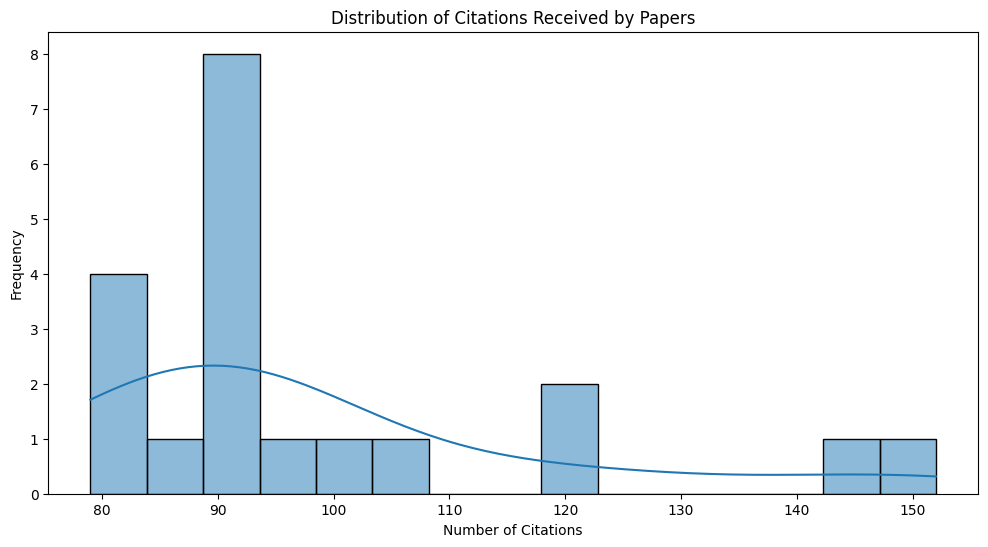

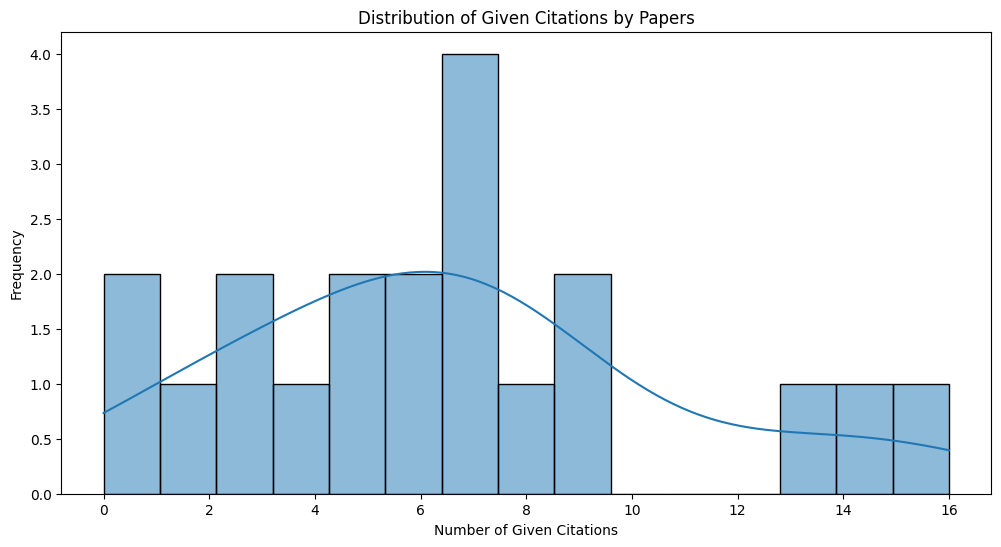

Select a Graph Type (1 for Citation Graph, 2 for Collaboration Graph): 2
Select a Functionality:
1. Visualize Graph's Features
2. Visualize Nodes' Contribution
3. Exit
Enter your choice (1, 2, or 3): 2
Enter the node (paper/author) for analysis: Rodrigo Lopez

Centrality Measurements for Node Rodrigo Lopez in Collaboration Graph:
+------------------------+-----------------------+
| Centrality Measurement |   Centrality Value    |
+------------------------+-----------------------+
| Betweenness Centrality | 0.0003623308992108623 |
|  PageRank Centrality   | 0.000264490192829495  |
|  Closeness Centrality  | 0.012070332997854996  |
|   Degree Centrality    | 0.006673137587964086  |
+------------------------+-----------------------+
Select a Graph Type (1 for Citation Graph, 2 for Collaboration Graph): 1
Select a Functionality:
1. Visualize Graph's Features
2. Visualize Nodes' Contribution
3. Exit
Enter your choice (1, 2, or 3): 3
Exiting the control system. Goodbye!


In [ ]:
def show_menu():
    print("Select a Functionality:")
    print("1. Visualize Graph's Features")
    print("2. Visualize Nodes' Contribution")
    print("3. Exit")

def main():


  while True:
    graph_type_choice = input("Select a Graph Type (1 for Citation Graph, 2 for Collaboration Graph): ")
    graph_name = "Citation Graph" if graph_type_choice == '1' else "Collaboration Graph"
    graph = citation_graph if graph_type_choice == '1' else collaboration_graph
    show_menu()
    choice = input("Enter your choice (1, 2, or 3): ")

    if choice == '1':
      # Visualize Graph's Features
      num_nodes_to_display = int(input("Enter the number of nodes to display (default is 20): "))
      visualize_graph_features(graph, graph_name, num_nodes_to_display)

    elif choice == '2':
      # Visualize Nodes' Contribution
      node = input("Enter the node (paper/author) for analysis: ")
      visualize_node_contribution(graph, node, graph_name)

    elif choice == '3':
      print("Exiting the control system. Goodbye!")
      break

    else:
      print("Invalid choice. Please enter 1, 2, or 3.")

if __name__ == "__main__":
    main()

4. Functionality 4

To solve this functionality we decided to use a "Breadth-first search" approach. The bfs function written down execute the algorithm, so that min_disconnect() can use it in order to calculate the minimum number of edges to erase to obtain two disconnected subgraphs.

In [14]:
from collections import deque

def bfs(graph, start, end):
    visited = set()
    queue = deque([(start, 0)])

    while queue:
        current_node, distance = queue.popleft()
        if current_node == end:
            return distance

        if current_node not in visited:
            visited.add(current_node)
            for neighbor, weight in graph.get(current_node, {}).items():
                queue.append((neighbor, distance + 1))

    return float('inf')

def min_disconnect(collaboration_graph, authorA, authorB, N):
    # Get top N authors by degree
    top_authors = sorted(collaboration_graph.degree, key=lambda x: x[1], reverse=True)[:int(N)]

    # Extract nodes and create a subgraph
    aut = []
    for author in top_authors:
        aut.append(author[0])

    aut_g = collaboration_graph.subgraph(aut)

    # Get nodes with at least two edges
    top_authors = []
    for node, degree in aut_g.degree():
        if degree > 1:
            top_authors.append(node)

    top_nodes = [author for author in top_authors if author in collaboration_graph]
    graph_N = {node: collaboration_graph[node] for node in top_nodes}

    # Find minimum distance with bfs
    min_distance = bfs(graph_N, authorA, authorB)

    # If there is no connection between the nodes, the function returns -1
    if min_distance == float('inf'):
        return -1, graph_N

    # If there is a link, the solution is min_distance
    min_edges_to_disconnect = min_distance

    return min_edges_to_disconnect, graph_N


We select two casual authors to try wether the function works

In [15]:
top_10_collaborators

['Aron Marchler-Bauer',
 'David I. Hurwitz',
 'Gabriele H. Marchler',
 'James S. Song',
 'Roxanne A. Yamashita',
 'Shennan Lu',
 'Narmada Thanki',
 'Marc Gwadz',
 'Dachuan Zhang',
 'Rodrigo Lopez']

In [16]:
min_edges_result,graph=min_disconnect(collaboration_graph,top_10_collaborators[0],top_10_collaborators[1],500)
print(min_edges_result)

1


This example output tells that we need to remove at least one edge in order to disconnect the graphs for these two authors

Visualization 4

5. Functionality 5

The objective of this functionality is extract communities in the citation_grap. We define communities as connected components of a graph, so we proceed by checking if the input graph is connected and thn if the check is passed we compute:
* The minimum number of edges that should be removed to form communities
* A list of communities, each containing a list of papers that belong to them.
* Whether the Paper_1 and Paper_2 belongs to the same community.

In [83]:
def find_communities(graph, node1, node2):
    # We need to work on an undirected graph so we change the original one to an undirected copy
    undirected_graph = graph.to_undirected()

    if nx.number_connected_components(undirected_graph) > 1:
        print("The graph is not fully connected!")
        return 0, [], False, None

    # We compute the initial number of edges
    initial_edge_count = undirected_graph.number_of_edges()

    # We calculate the betweenness centrality for each edge...
    edge_betweenness_centrality = nx.edge_betweenness_centrality(undirected_graph)

    # ...Then we sort them in descending order
    sorted_edges = sorted(edge_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

    # We proceed by removing edges until the graph has more than one connected component
    while nx.number_connected_components(undirected_graph) == 1:
        edge_to_remove = sorted_edges.pop(0)[0]
        undirected_graph.remove_edge(*edge_to_remove)

    # The connected components are the communities
    communities = list(nx.connected_components(undirected_graph))

    # We check if nthe two input nodes belong to the same community
    in_same_community = any({node1, node2} <= community for community in communities)

    # We compute the minimum number of edges to remove
    final_edge_count = undirected_graph.number_of_edges()

    graph_copy = undirected_graph.copy()

    # Output customization:
    print("Initial number of edges:", initial_edge_count)
    print("Number of edges removed:", initial_edge_count - final_edge_count)
    print("Final number of edges:", final_edge_count)

    if not communities:
        print("No communities found.")
    else:
        print("Communities found:", communities)

    print(f"{node1} and {node2} are {'in the same community' if in_same_community else 'not in the same community'}")

    return initial_edge_count - final_edge_count, communities, in_same_community, graph_copy


In [84]:
ex=list(citation_graph.nodes())
min, cm, is_cm, g_copy = find_communities(collaboration_graph.copy(), ex[0], ex[23])

The graph is not fully connected!


The graph is not connected so we decided to use only the largest connected component

In [85]:
# We find the strongly connected components
strongly_connected_components = nx.strongly_connected_components(citation_graph)

# From the strongly connected components we select the largest...
giant_component = max(strongly_connected_components,key=len)

# We create the subgraph containing only the nodes and edges of the giant_component
citation_conn = citation_graph.subgraph(giant_component)

We proceed by running some examples

In [86]:
ex=list(citation_conn.nodes())
min, cm, is_cm, g_copy = find_communities(citation_conn.copy(), ex[0], ex[12])

Initial number of edges: 230
Number of edges removed: 28
Final number of edges: 202
Communities found: [{2037227137, 2144172034, 1686810756, 2161381512, 2134670479, 2950635152, 2613718673, 1903029394, 2155541015, 2179352600, 2133564696, 2294059674, 1524680991, 1799366690, 2949888546, 2951548327, 2095705004, 1591801644, 2951912364, 2062118960, 1976948919, 2124592697, 1836465849, 2123024445, 2949117887, 2016053056, 2117539524, 2963173190, 1536680647, 2097117768, 2950094539, 2102605133, 2952186574, 2950179405, 2618530766, 2156303437, 1677182931, 2172140247, 7746136, 1948751323, 2145287260, 2949650786, 2163922914, 1998808035, 2952122856, 2952186347, 104184427, 2113325037, 1527575280, 2155893237, 154472438, 2130942839, 1861492603, 2183182206, 1849277567}, {2157331557}]
2037227137 and 1524680991 are in the same community


In [87]:
ex=list(citation_conn.nodes())
min, cm, is_cm, g_copy = find_communities(citation_conn.copy(), "2161381512", "2157331557")

Initial number of edges: 230
Number of edges removed: 28
Final number of edges: 202
Communities found: [{2037227137, 2144172034, 1686810756, 2161381512, 2134670479, 2950635152, 2613718673, 1903029394, 2155541015, 2179352600, 2133564696, 2294059674, 1524680991, 1799366690, 2949888546, 2951548327, 2095705004, 1591801644, 2951912364, 2062118960, 1976948919, 2124592697, 1836465849, 2123024445, 2949117887, 2016053056, 2117539524, 2963173190, 1536680647, 2097117768, 2950094539, 2102605133, 2952186574, 2950179405, 2618530766, 2156303437, 1677182931, 2172140247, 7746136, 1948751323, 2145287260, 2949650786, 2163922914, 1998808035, 2952122856, 2952186347, 104184427, 2113325037, 1527575280, 2155893237, 154472438, 2130942839, 1861492603, 2183182206, 1849277567}, {2157331557}]
2161381512 and 2157331557 are not in the same community


Visualization 5

This visualization function should:
* Print the number of links that should be removed to have the communities
* A table depicting the communities and the papers that belong to each community
* Plot the original graph
* Plot the graph showing the communities in the network
* Plot the final graph and identify the community/communities of Paper_1 and Paper_2

In [76]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def visualize_communities(input_graph, start_node, end_node):
    min_edge_count, communities, in_same_community, final_graph_copy = find_communities(input_graph, start_node, end_node)

    print("------------------------------- TABLE OF COMMUNITIES -------------------------------")
    
    # We formatted communities for table display
    communities_display = []
    for comm in communities:
        if len(comm) > 4:
            communities_display.append(list(comm)[:4] + ['...'])
        else:
            communities_display.append(list(comm))
    
    # We create a dataframe to improve the visualization 
    df = pd.DataFrame({"Index": range(len(communities_display)), "Community": communities_display})
    
    # Print the table
    print(df)
    print("---------------------------------------------------------------------------------")

    
    initial_layout = nx.spring_layout(input_graph)
    community_layout = nx.spring_layout(input_graph)
    final_layout = nx.spring_layout(final_graph_copy)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    axes[0].set_title('Original Graph')
    axes[1].set_title('Graph Showing the Communities')
    axes[2].set_title('Final Graph')

    # Graph 1
    for node in input_graph.nodes:
        community_node_colors = ['red' if node == start_node or node == end_node else 'skyblue']
    nx.draw(input_graph, pos=initial_layout, ax=axes[0], with_labels=False, node_color=community_node_colors, edge_color='gray')
    
    # Graph 2
    community_node_colors = []
    for node in input_graph.nodes:
        color = 'red' if node == start_node or node == end_node else 'skyblue'
        community_node_colors.append(color)
    nx.draw(input_graph, pos=community_layout, node_color=community_node_colors, ax=axes[1], with_labels=False, edge_color='gray')

    # Graph 3
    node_labels = {}
    final_node_colors = []
    for comm_id, nodes in enumerate(communities):
        for node in nodes:
            node_labels[node] = f'Cm.{comm_id}'
            color = 'red' if node == start_node or node == end_node else 'skyblue'
            final_node_colors.append(color)

    nx.draw(final_graph_copy, pos=final_layout, node_color=final_node_colors, cmap=plt.cm.rainbow, labels=node_labels, ax=axes[2], with_labels=False, edge_color='gray')

    plt.show()


------------------------------- TABLE OF COMMUNITIES -------------------------------
   Index                                          Community
0      0  [2037227137, 2144172034, 1686810756, 216138151...
1      1                                       [2157331557]
---------------------------------------------------------------------------------


/Users/pietrosciabbarrasi/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


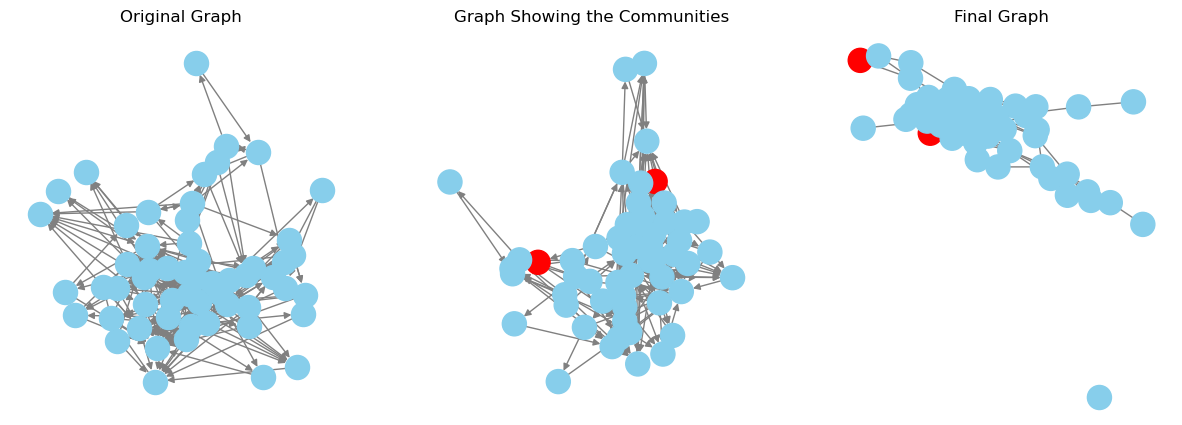

In [77]:
visualize_communities(citation_conn.copy(),ex[0],ex[1])

-----------------------------------------------------------------

# 4.

We created a citation_graph.txt file in order to use it in the terminal to answer the command line questions


In [25]:
import networkx as nx

citation_graph = nx.DiGraph()

citation_graph.add_edges_from(citation_edges)


with open("citation_graph.txt", "w") as file:
    for edge in citation_graph.edges():
        file.write(f"{edge[0]} {edge[1]}\n")
# The file will have the nodes' ids paired when there is a link between the
# two of them

With the the "CommandLine.sh" file we managed to answer the questions, the output obtained is written below: (For the code look at the .sh file in the repo)

1. Is there any node that acts as an important "connector" between the different parts of the graph?

* Identifying a critical connector node: Node: 2151103935, Degree: 131

So the node with the id "2076063813" is the one that acts like an important connector with a degree = 131.

2. How does the degree of citation vary among the graph nodes?

* Exploring the range of Citation Degrees: 1 131

This output shows that the node's degree changes between a minimum of 1 and a maximum of 131.

3. What is the average length of the shortest path among nodes?

* The graph is not strongly connected. Calculating average shortest path lengths for the connected components: Average Length of Shortest Paths (Total): 0.032781274999290184

For this question we checked how much the graph is connected, the output tells that the graph is not strongly connected so we proceeded to analyze the connected components and then finding their average Shortest Path Length.
